<a href="https://colab.research.google.com/github/prgmr99/machine_learning-sklearn/blob/main/sklearn_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 특성: 수치형 값을 예측(Y의 값이 연속형 수치로 표혐)
# 예시: 주택 가격 예측, 매출액 예측

# **0. 데이터 셋**

In [2]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)
# If True, print floating point numbers instead of scientific notation

In [3]:
from sklearn.datasets import load_boston

### **0-1. 데이터 로드**

In [4]:
data=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
print(data['DESCR']) # data description

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# step 1. features (X)
# data=['data']-feature data; data['feature_names'] - feature column names

df=pd.DataFrame(data['data'],columns=data['feature_names'])

# step 2. target (y) 추가
df['MEDV']=data['target']

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# **1. Training set / Test set 나누기**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_valid,y_train,y_valid=train_test_split(df.drop('MEDV',1),df['MEDV'],random_state=23)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [10]:
x_train.shape, y_train.shape

((379, 13), (379,))

In [11]:
x_valid.shape,y_valid.shape

((127, 13), (127,))

In [12]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
112,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
301,0.03537,34.0,6.09,0.0,0.433,6.590,40.4,5.4917,7.0,329.0,16.1,395.75,9.50
401,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32
177,0.05425,0.0,4.05,0.0,0.510,6.315,73.4,3.3175,5.0,296.0,16.6,395.60,6.29
69,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98
230,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8.0,307.0,17.4,378.35,11.65


In [13]:
y_train.head()

112    18.8
301    22.0
401     7.2
177    24.6
69     20.9
Name: MEDV, dtype: float64

# **2. 평가 지표 만들기**
### **2-1. 평가 지표 계산식**

**(1) MAE (Mean Absolute Error)**
  
:   예측값과 실제값의 차이의 절대값에 대해여 평균을 낸 것.

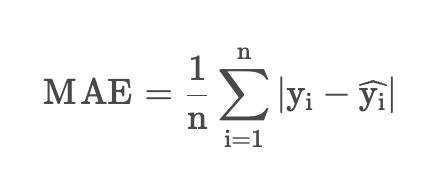

**(2) MSE (Mean Squared Error)**
  
:   예측값과 실제값의 차이의 제곱에 대해여 평균을 낸 것.

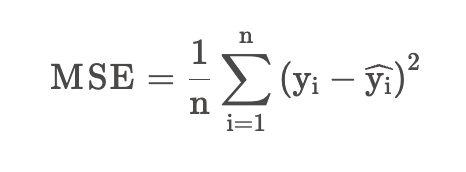

**(3) RMSE (Root Mean Squared Error)**
  
:   예측값과 실제값의 차이의 제곱에 대하여 평균을 낸 뒤 루트를 씌운 것.

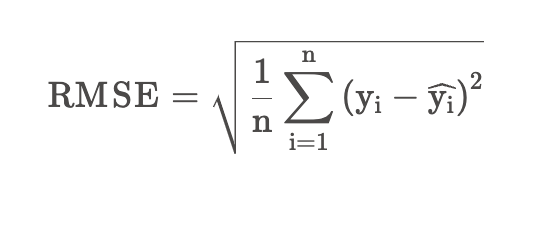

### **2-2. 코딩으로 평가 지표 만들어 보기**

In [14]:
import numpy as np
actual=np.array([1,2,3])
pred=np.array([3,4,5])

In [15]:
# MAE
def my_mae(actual,pred):
  return np.abs(actual-pred).mean()

my_mae(actual,pred)

2.0

In [16]:
# MSE
def my_mse(actual,pred):
  return ((actual-pred)**2).mean()

my_mse(actual,pred)

4.0

In [17]:
# RMSE
def my_rmse(actual,pred):
  return np.sqrt(my_mse(actual,pred))

my_rmse(actual,pred)

2.0

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
# MAE (my_mae vs sklearn_mae)
my_mae(actual, pred), mean_absolute_error(actual, pred)

(2.0, 2.0)

In [20]:
# MSE (my_mse VS sklearn_mse)
my_mse(actual, pred), mean_squared_error(actual, pred)

(4.0, 4.0)

### **2-4. 모델 성능 확인을 위한 함수**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# prediction plot
def plot_predictions(name_, actual, pred):
    df = pd.DataFrame({'actual': y_valid, 'prediction': pred})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

# evaluation plot
def mse_eval(name_, actual, pred):
    global predictions
    global colors

    plot_predictions(name_, actual, pred)

    mse = mean_squared_error(actual, pred)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

# remove model
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

# **3. 회귀 알고리즘**
### **3-1. Linear Regression**

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression(n_jobs=-1)
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [24]:
pred=model.predict(x_valid)

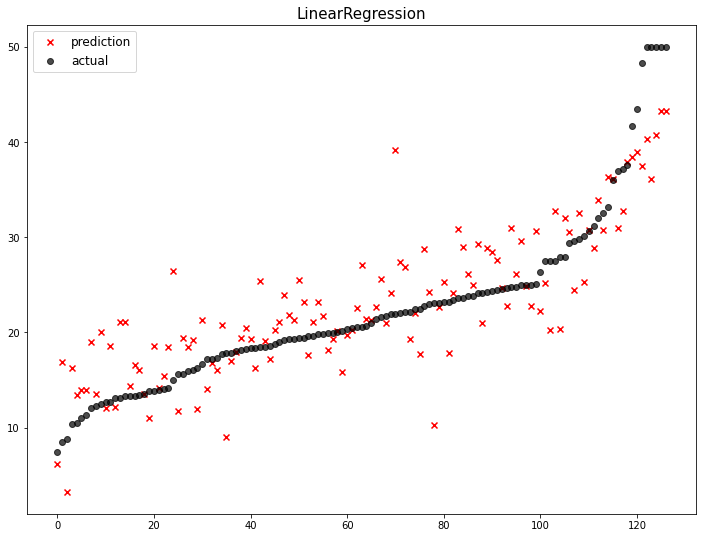

              model        mse
0  LinearRegression  22.770784


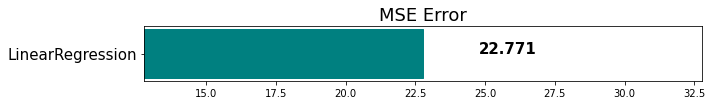

In [25]:
mse_eval('LinearRegression',y_valid,pred)

### **3-2. Ridge & LASSO & ElasiticNet**
(1) 개념

**정규화/규제(Regularization)**: 학습이 과적합되는 것을 방지하고자 일종의 **penalty**를 부여하는 것.

[원리]: penalty를 부여하여 가중치($\beta$)를 축소함으로써 학습 모델의 예측 variance(분산)를 감소시키는 것. 

<L2 규제 & Ridge (릿지)>

*   **L2 규제(L2 Regularization)**: *각 가중치 제곱의 합*에 규제 강도 (Regularization Strength)  $\lambda$를 곱한다.
*   **Ridge**: Loss Function에 L2 규제를 더한 값을 최소화 시키는 것
*   $\lambda$를 크게 하면 가중치($\beta$)가 더 많이 감소되고(규제를 중요시 함),  $\lambda$를 작게 하면 가중치($\beta$)가 증가한다.(규제를 중요시하지 않음)




<**L1 규제 & LASSO**>


*   **L1 규제(L1 Regularization)**: 각 가중치 절대값의 합에 규제 강도(Regularization Strength) $\lambda$를 곱한다.
*   **LASSO**: Loss Function에 L1 규제를 더한 값을 최소화 시키는 것

*   어떤 가중치($\beta$)는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것


<**ElasticNet**>

**l1_ratio(default=0.5)


*   l1_ratio=0 (L2 규제만 사용)

*   l1_ratio=1 (L1 규제만 사용)
*   0<l1_ratio<1 (L1 and L2 규제 혼합사용)







---
(직접 정리)

**정규화(Regularization)**: 회귀모델에서의 정규화란 모델을 변형하여 과적합을 완화해 일반화 성능을 높여주기 위한 기법.

정규화의 강도를 조절해주는 패널티 값인 람다(lambda, λ)는 다음과 같은 성질을 가지고 있다.


*   λ → 0 이라면 β 
ridge
​
  → β 
OLS
*   λ → ∞ 이라면 β 
ridge
​
  → 0

식을 확인한다면 어떤 의미인지 더 확실하게 와닿을 것이다.

Ridge regression와 Lasso regression를 이해하려면 일단 정규화(regularization)를 이해해야한다.

가장 적합한 모델을 만들기 위해서는 bias와 variance를 둘 다 줄여주면 좋지만 하나를 포기해야 하는 경우가 발생한다.

MSE만 쓰면 현재 데이터에 대한 예측을 잘할 수 있고 bias도 없으면서 가장 작은 분산(variance)를 가질 수 있다. 

하지만, 미래에 대한 예측도 잘하고 싶다면 bias를 조금 포기하고 분산을 더 낮추면 된다.
그래서 회귀계수의 제곱의 합에 람다를 곱하므로써 구현할 수 있다.


### **(2) 실습**

Ridge

In [26]:
from sklearn.linear_model import Ridge

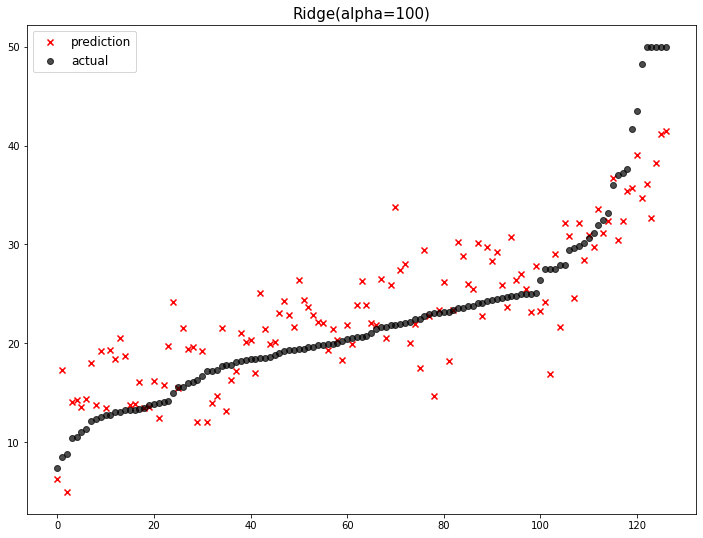

              model        mse
0  Ridge(alpha=100)  23.487453
1  LinearRegression  22.770784


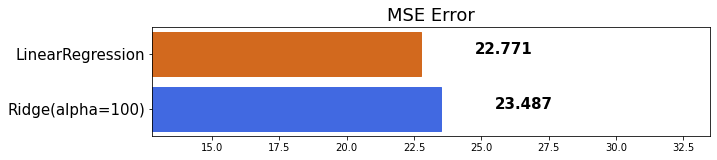

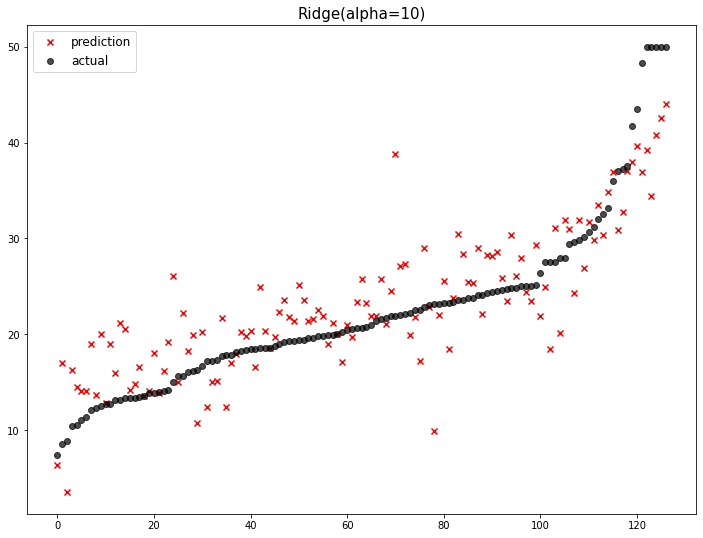

              model        mse
0  Ridge(alpha=100)  23.487453
1   Ridge(alpha=10)  22.793119
2  LinearRegression  22.770784


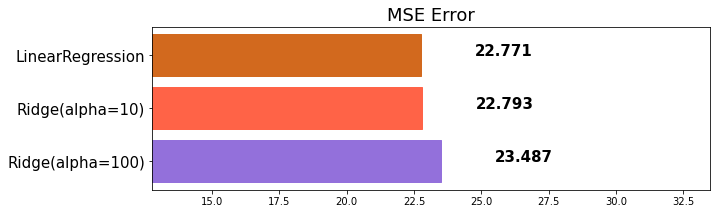

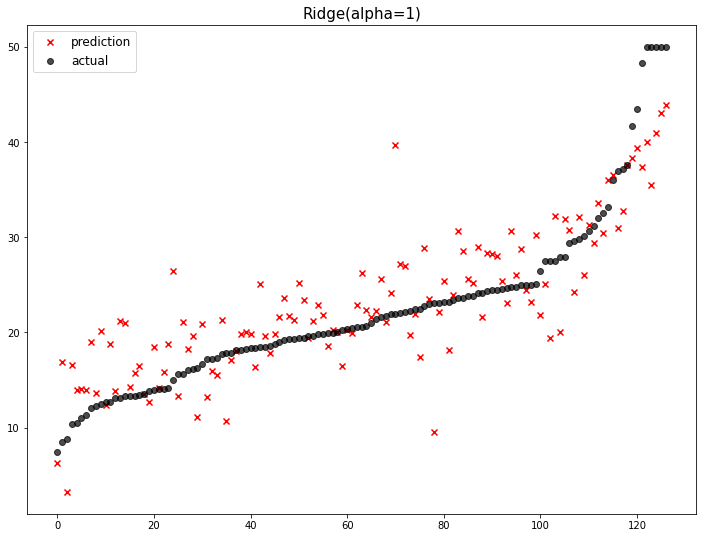

              model        mse
0  Ridge(alpha=100)  23.487453
1   Ridge(alpha=10)  22.793119
2  LinearRegression  22.770784
3    Ridge(alpha=1)  22.690411


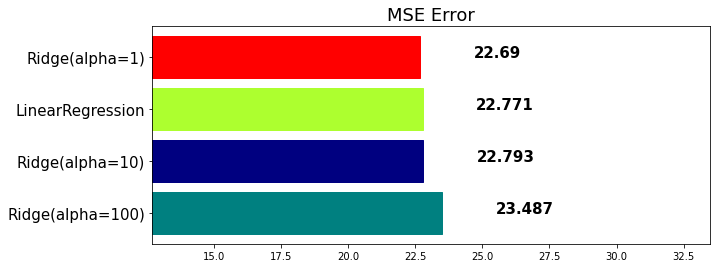

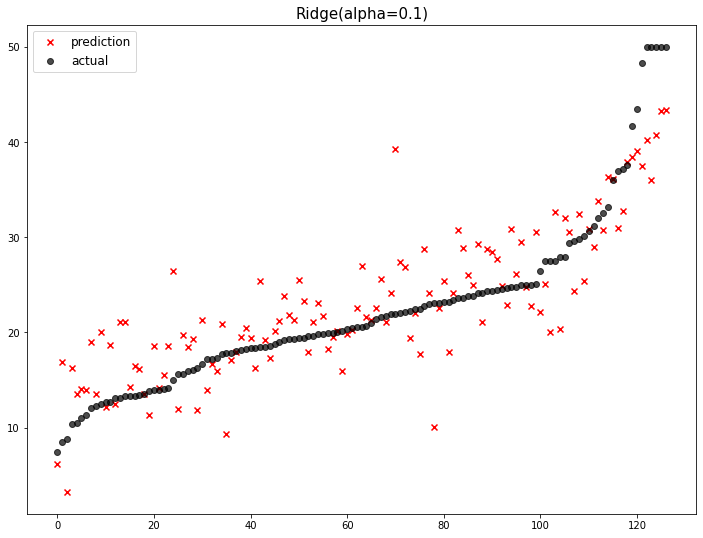

              model        mse
0  Ridge(alpha=100)  23.487453
1   Ridge(alpha=10)  22.793119
2  LinearRegression  22.770784
3  Ridge(alpha=0.1)  22.718126
4    Ridge(alpha=1)  22.690411


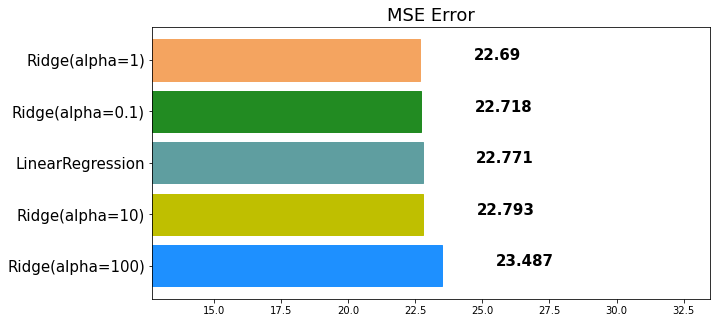

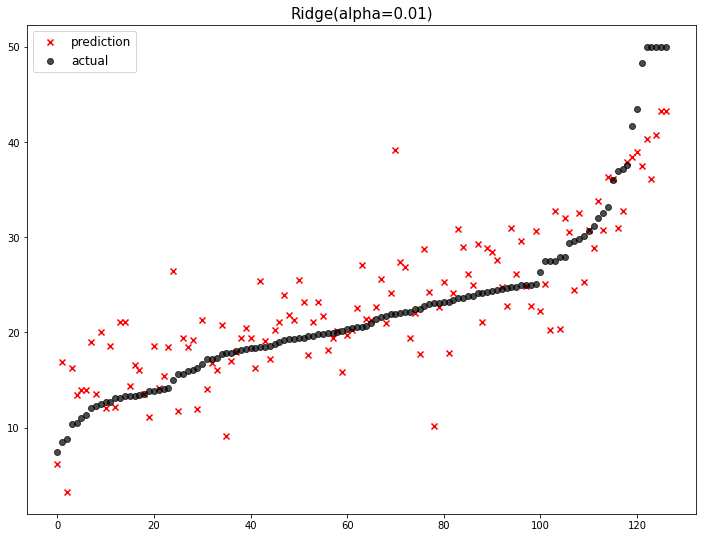

               model        mse
0   Ridge(alpha=100)  23.487453
1    Ridge(alpha=10)  22.793119
2   LinearRegression  22.770784
3  Ridge(alpha=0.01)  22.764254
4   Ridge(alpha=0.1)  22.718126
5     Ridge(alpha=1)  22.690411


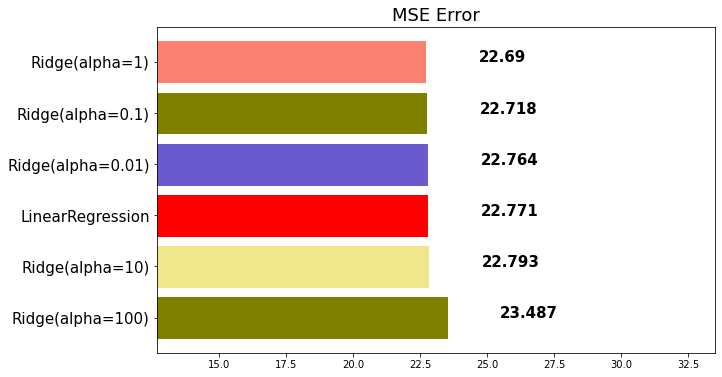

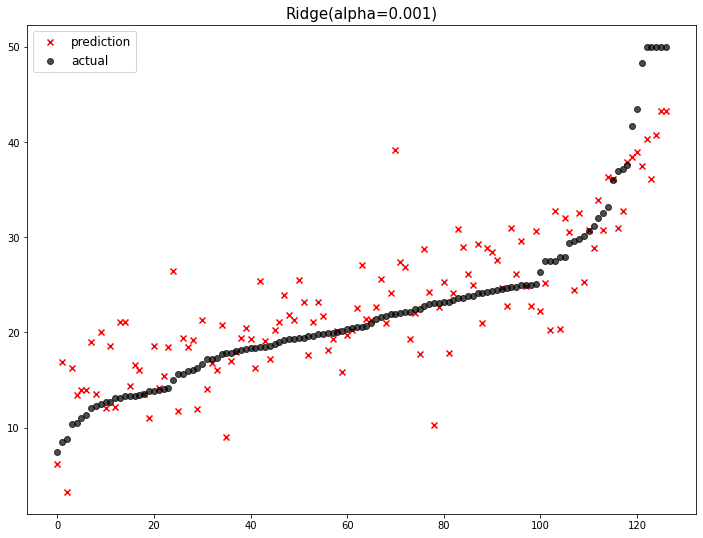

                model        mse
0    Ridge(alpha=100)  23.487453
1     Ridge(alpha=10)  22.793119
2    LinearRegression  22.770784
3  Ridge(alpha=0.001)  22.770117
4   Ridge(alpha=0.01)  22.764254
5    Ridge(alpha=0.1)  22.718126
6      Ridge(alpha=1)  22.690411


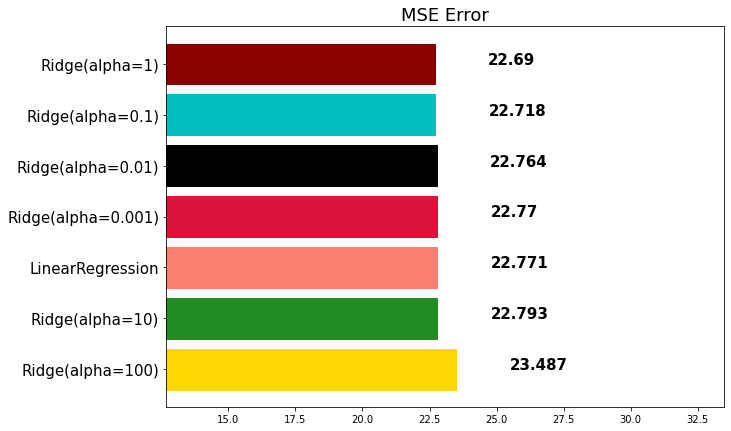

In [27]:
# lambda (규제강도) 범위 설정
# alpha = lambda = regularization parameter = penalty term
alphas=[100,10,1,0.1,0.01,0.001]

# 모델 학습
for alpha in alphas:
  ridge=Ridge(alpha=alpha)
  ridge.fit(x_train,y_train)
  ridge_pred=ridge.predict(x_valid)
  mse_eval('Ridge(alpha={})'.format(alpha),y_valid,ridge_pred)



*   coefficents 값 확인



In [28]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [29]:
ridge.coef_ # for the last alpha in 'alphas'

array([ -0.09608448,   0.04753482,   0.0259022 ,   3.24479273,
       -18.89579975,   4.06725732,   0.0020486 ,  -1.46883742,
         0.28149275,  -0.0094656 ,  -0.87454099,   0.01240815,
        -0.52406249])

In [30]:
# coefficients visualization

def plot_coef(columns, coef):
  coef_df=pd.DataFrame(list(zip(columns,coef)))
  coef_df.columns=['feature','coef']
  coef_df=coef_df.sort_values('coef',ascending=False).reset_index(drop=True)

  fig, ax=plt.subplots(figsize=(9,7))
  ax.barh(np.arange(len(coef_df)),coef_df['coef'])
  idx=np.arange(len(coef_df))
  ax.set_yticks(idx)
  ax.set_yticklabels(coef_df['feature'])
  fig.tight_layout()
  plt.show()

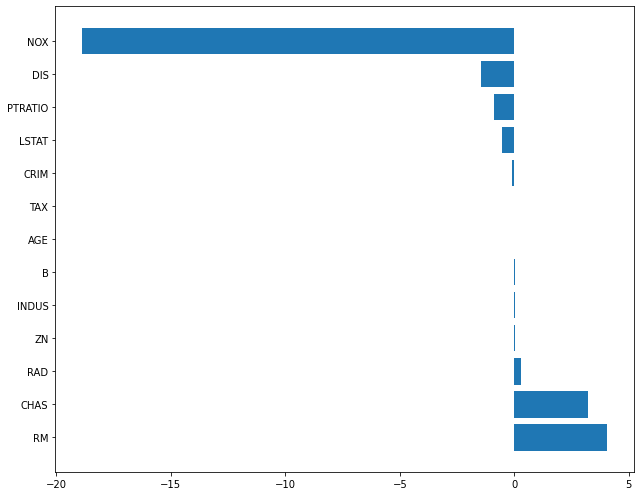

In [31]:
plot_coef(x_train.columns, ridge.coef_) # alpha=0.001



*   alpha 값에 따른 coef의 차이



In [32]:
ridge_1=Ridge(alpha=1)
ridge_1.fit(x_train,y_train)
ridge_pred_1=ridge_1.predict(x_valid)

In [33]:
ridge_100=Ridge(alpha=100)
ridge_100.fit(x_train,y_train)
ridge_pred_100=ridge_100.predict(x_valid)

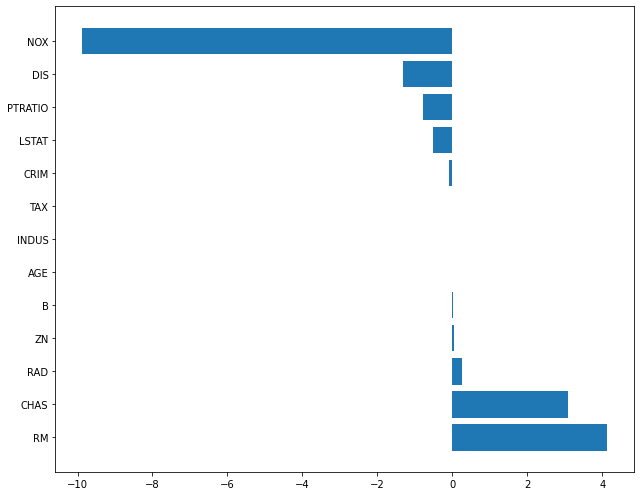

In [34]:
plot_coef(x_train.columns,ridge_1.coef_) # alpha = 1

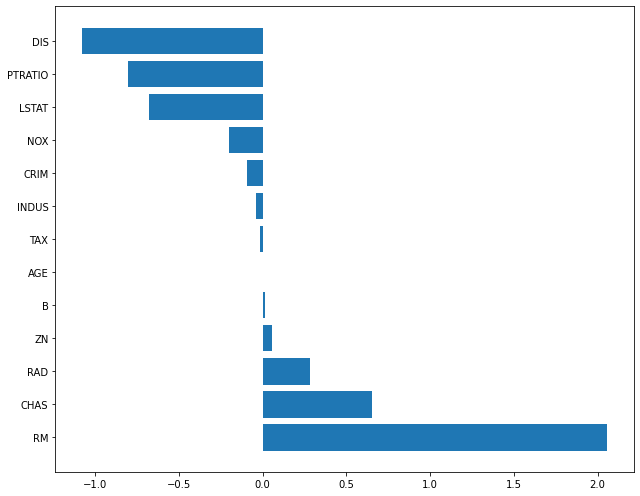

In [35]:
plot_coef(x_train.columns, ridge_100.coef_)

**LASSO**

In [36]:
from sklearn.linear_model import Lasso

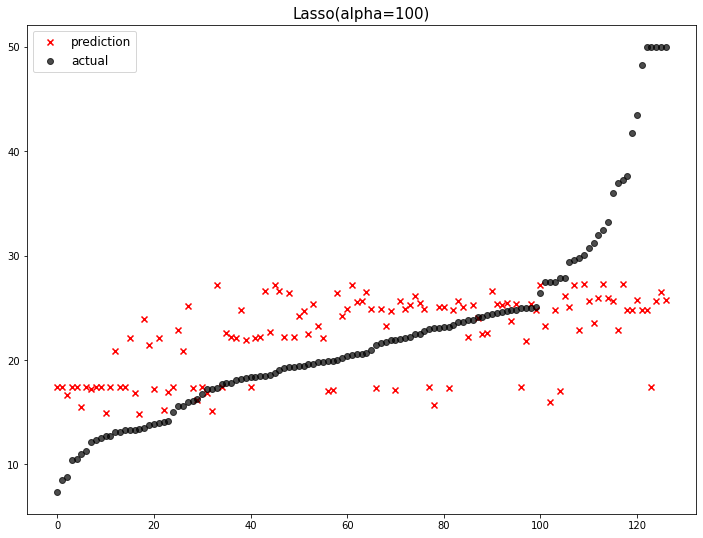

                model        mse
0    Lasso(alpha=100)  63.348818
1    Ridge(alpha=100)  23.487453
2     Ridge(alpha=10)  22.793119
3    LinearRegression  22.770784
4  Ridge(alpha=0.001)  22.770117
5   Ridge(alpha=0.01)  22.764254
6    Ridge(alpha=0.1)  22.718126
7      Ridge(alpha=1)  22.690411


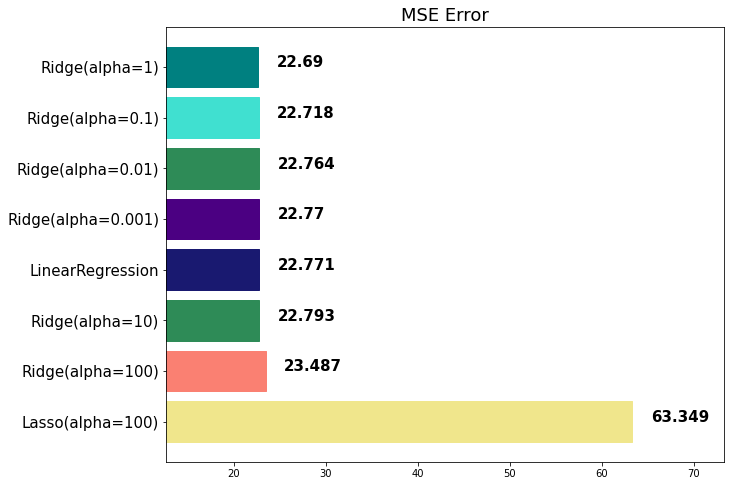

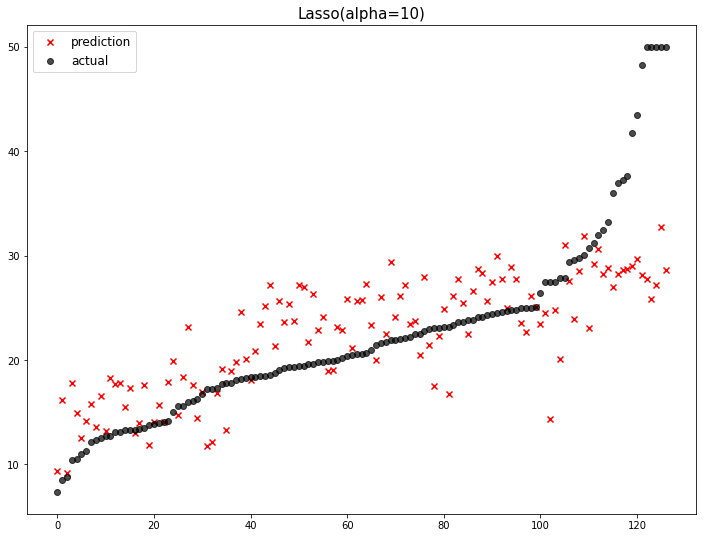

                model        mse
0    Lasso(alpha=100)  63.348818
1     Lasso(alpha=10)  42.436622
2    Ridge(alpha=100)  23.487453
3     Ridge(alpha=10)  22.793119
4    LinearRegression  22.770784
5  Ridge(alpha=0.001)  22.770117
6   Ridge(alpha=0.01)  22.764254
7    Ridge(alpha=0.1)  22.718126
8      Ridge(alpha=1)  22.690411


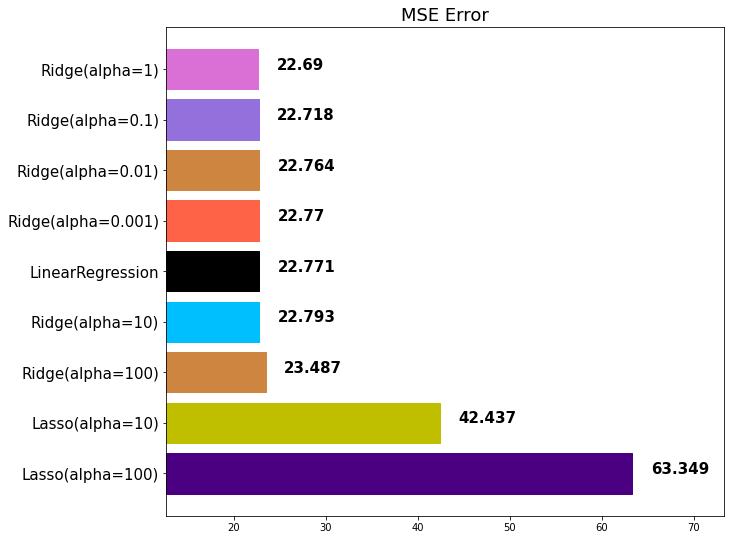

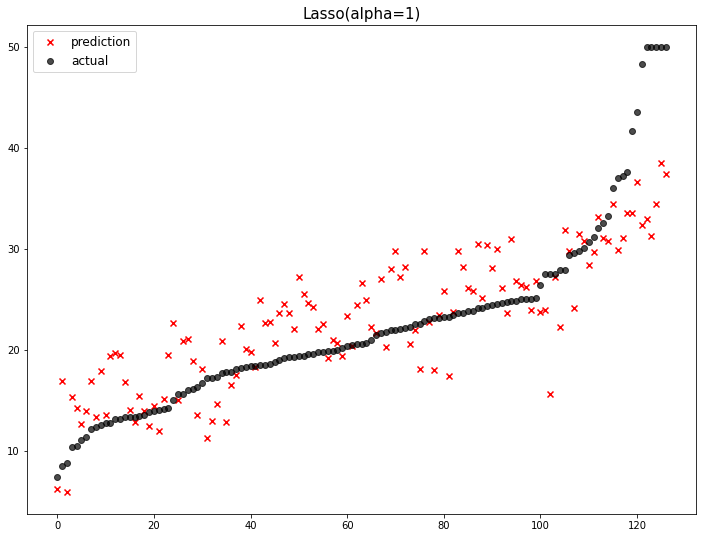

                model        mse
0    Lasso(alpha=100)  63.348818
1     Lasso(alpha=10)  42.436622
2      Lasso(alpha=1)  27.493672
3    Ridge(alpha=100)  23.487453
4     Ridge(alpha=10)  22.793119
5    LinearRegression  22.770784
6  Ridge(alpha=0.001)  22.770117
7   Ridge(alpha=0.01)  22.764254
8    Ridge(alpha=0.1)  22.718126
9      Ridge(alpha=1)  22.690411


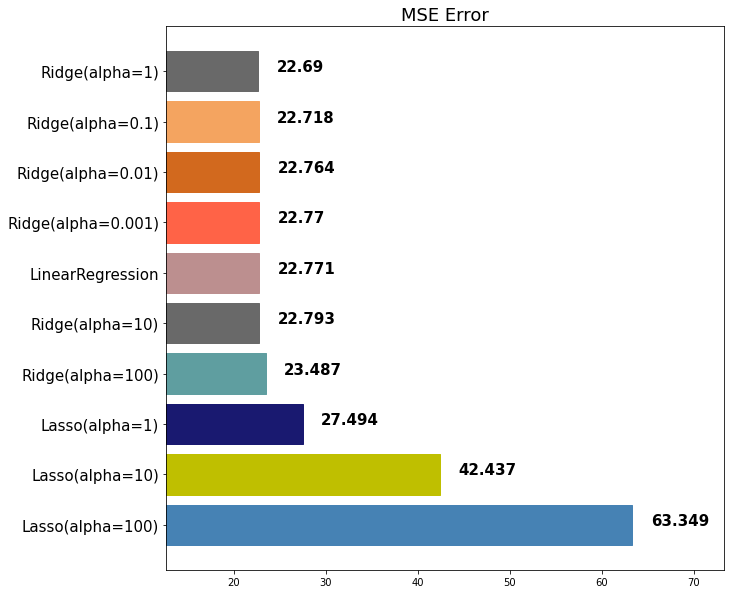

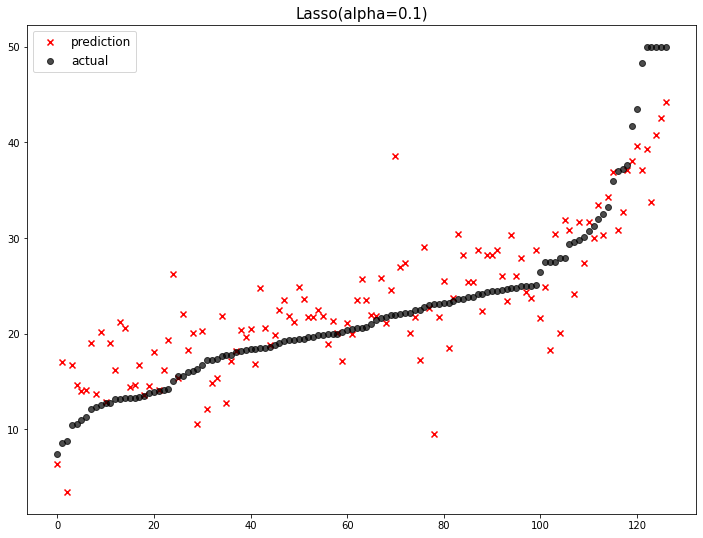

                 model        mse
0     Lasso(alpha=100)  63.348818
1      Lasso(alpha=10)  42.436622
2       Lasso(alpha=1)  27.493672
3     Ridge(alpha=100)  23.487453
4     Lasso(alpha=0.1)  22.979708
5      Ridge(alpha=10)  22.793119
6     LinearRegression  22.770784
7   Ridge(alpha=0.001)  22.770117
8    Ridge(alpha=0.01)  22.764254
9     Ridge(alpha=0.1)  22.718126
10      Ridge(alpha=1)  22.690411


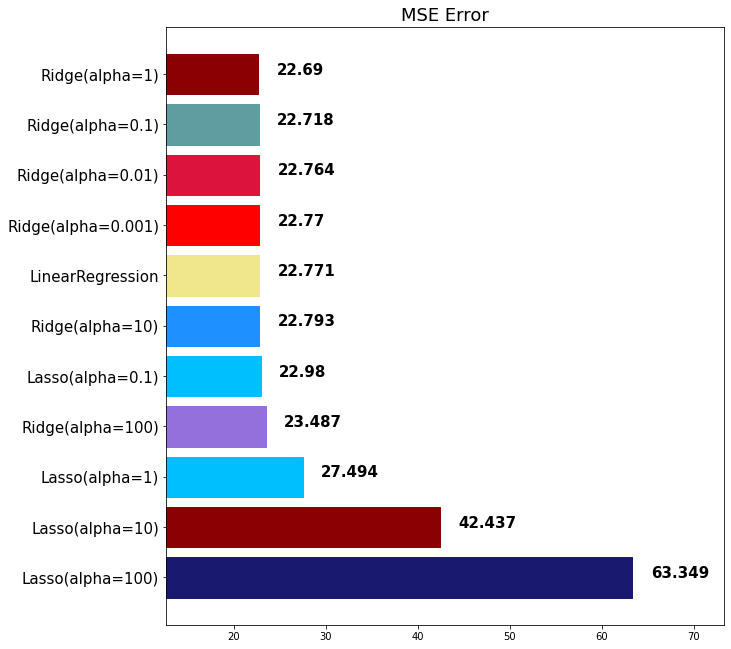

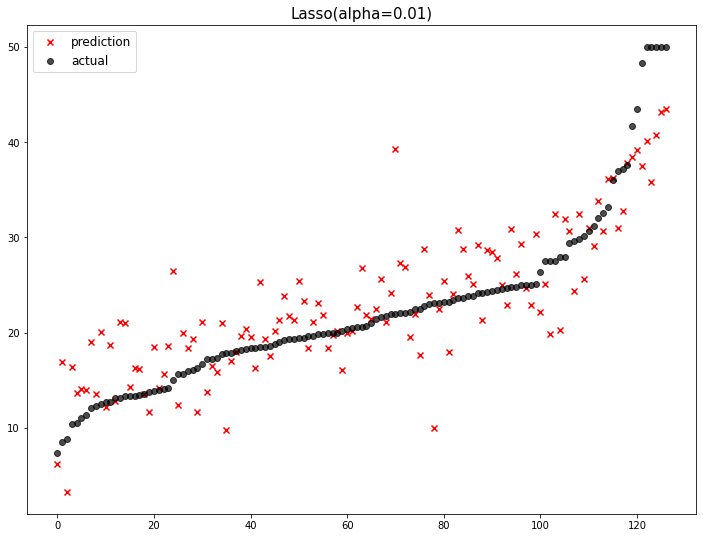

                 model        mse
0     Lasso(alpha=100)  63.348818
1      Lasso(alpha=10)  42.436622
2       Lasso(alpha=1)  27.493672
3     Ridge(alpha=100)  23.487453
4     Lasso(alpha=0.1)  22.979708
5      Ridge(alpha=10)  22.793119
6     LinearRegression  22.770784
7   Ridge(alpha=0.001)  22.770117
8    Ridge(alpha=0.01)  22.764254
9     Ridge(alpha=0.1)  22.718126
10      Ridge(alpha=1)  22.690411
11   Lasso(alpha=0.01)  22.635614


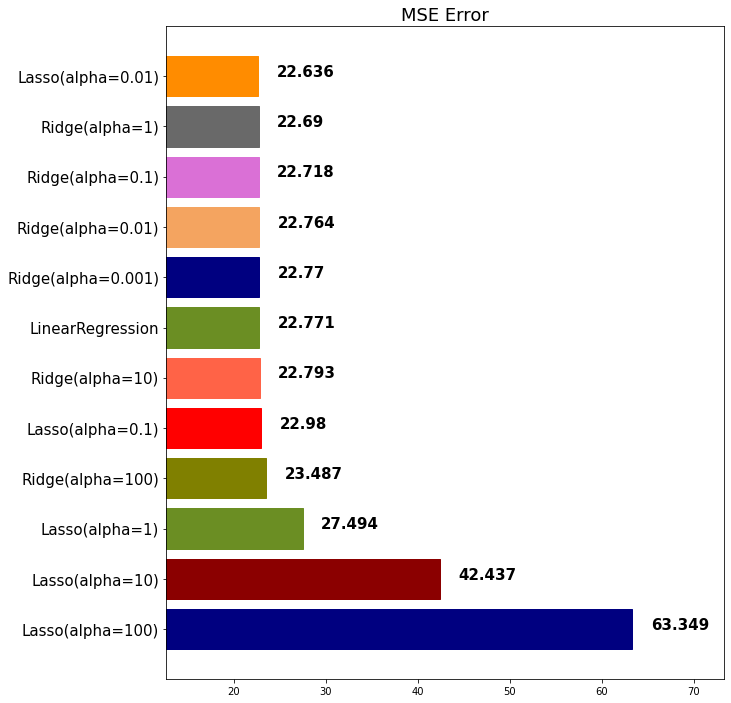

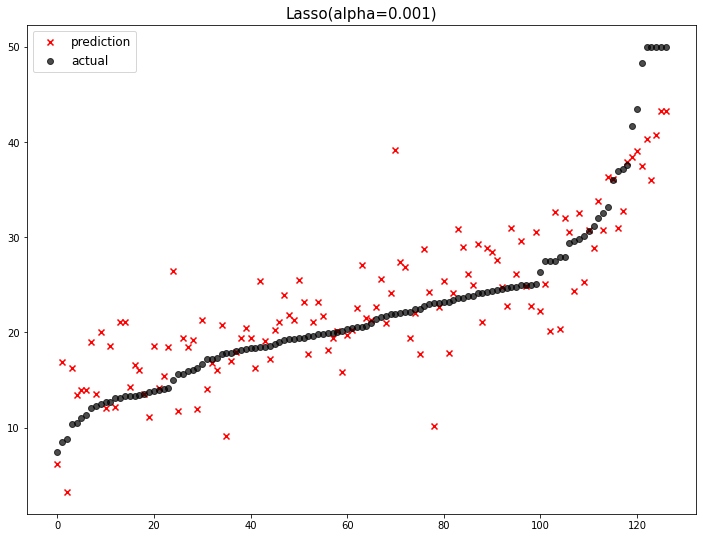

                 model        mse
0     Lasso(alpha=100)  63.348818
1      Lasso(alpha=10)  42.436622
2       Lasso(alpha=1)  27.493672
3     Ridge(alpha=100)  23.487453
4     Lasso(alpha=0.1)  22.979708
5      Ridge(alpha=10)  22.793119
6     LinearRegression  22.770784
7   Ridge(alpha=0.001)  22.770117
8    Ridge(alpha=0.01)  22.764254
9   Lasso(alpha=0.001)  22.753017
10    Ridge(alpha=0.1)  22.718126
11      Ridge(alpha=1)  22.690411
12   Lasso(alpha=0.01)  22.635614


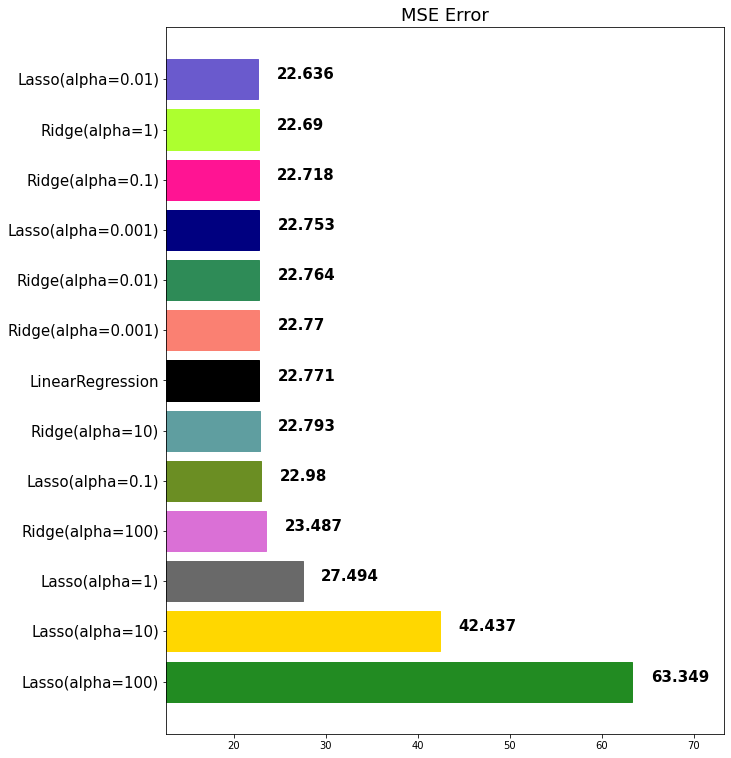

In [37]:
# lambda (규제강도) 범위 설정
alphas=[100,10,1,0.1,0.01,0.001]

# 모델 학습
for alpha in alphas:
  lasso=Lasso(alpha=alpha)
  lasso.fit(x_train,y_train)
  lasso_pred=lasso.predict(x_valid)
  mse_eval('Lasso(alpha={})'.format(alpha),y_valid,lasso_pred)



*   coefficients (회귀 계수) 값 확인 



In [38]:
# alpha = 0.01
lasso_01=Lasso(alpha=0.01)
lasso_01.fit(x_train,y_train)
lasso_pred_01=lasso_01.predict(x_valid)

# alpha = 100
lasso_100=Lasso(alpha=100)
lasso_100.fit(x_train,y_train)
lasso_100_pred=lasso_100.predict(x_valid)

In [39]:
# alpha=0.01
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [40]:
lasso_01.coef_

array([ -0.09427142,   0.04759954,   0.01255668,   3.08256139,
       -15.36800113,   4.07373679,  -0.00100439,  -1.40819927,
         0.27152905,  -0.0097157 ,  -0.84377679,   0.01249204,
        -0.52790174])

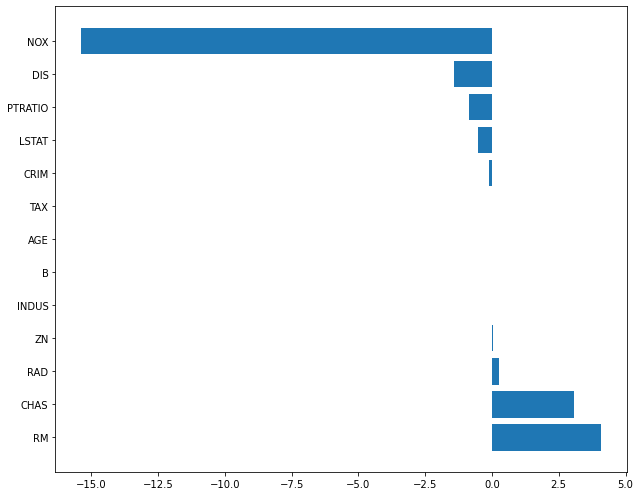

In [41]:
plot_coef(x_train.columns,lasso_01.coef_)

In [42]:
# alpha=100
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [43]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02078349,
       -0.        ,  0.00644409, -0.        ])

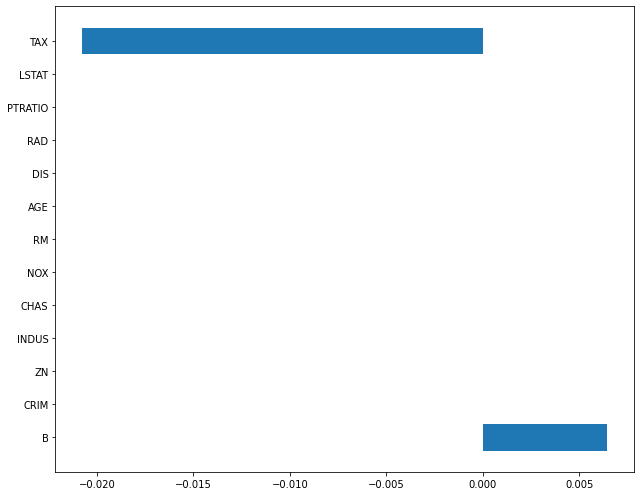

In [44]:
plot_coef(x_train.columns,lasso_100.coef_)

**ElasticNet**

In [45]:
from sklearn.linear_model import ElasticNet

In [49]:
# 예측 결과 확인
ratios=[0.01,0.1,0.2,0.5,0.8]

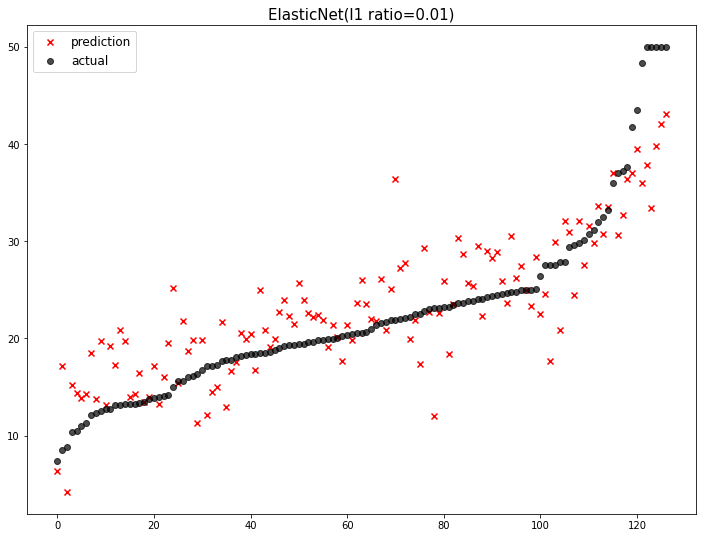

                        model        mse
0            Lasso(alpha=100)  63.348818
1             Lasso(alpha=10)  42.436622
2              Lasso(alpha=1)  27.493672
3            Ridge(alpha=100)  23.487453
4            Lasso(alpha=0.1)  22.979708
5    ElasticNet(l1 ratio=0.8)  22.865628
6             Ridge(alpha=10)  22.793119
7    ElasticNet(l1 ratio=0.5)  22.787269
8            LinearRegression  22.770784
9          Ridge(alpha=0.001)  22.770117
10          Ridge(alpha=0.01)  22.764254
11  ElasticNet(l1 ratio=0.01)  22.753745
12         Lasso(alpha=0.001)  22.753017
13   ElasticNet(l1 ratio=0.2)  22.749018
14           Ridge(alpha=0.1)  22.718126
15             Ridge(alpha=1)  22.690411
16          Lasso(alpha=0.01)  22.635614


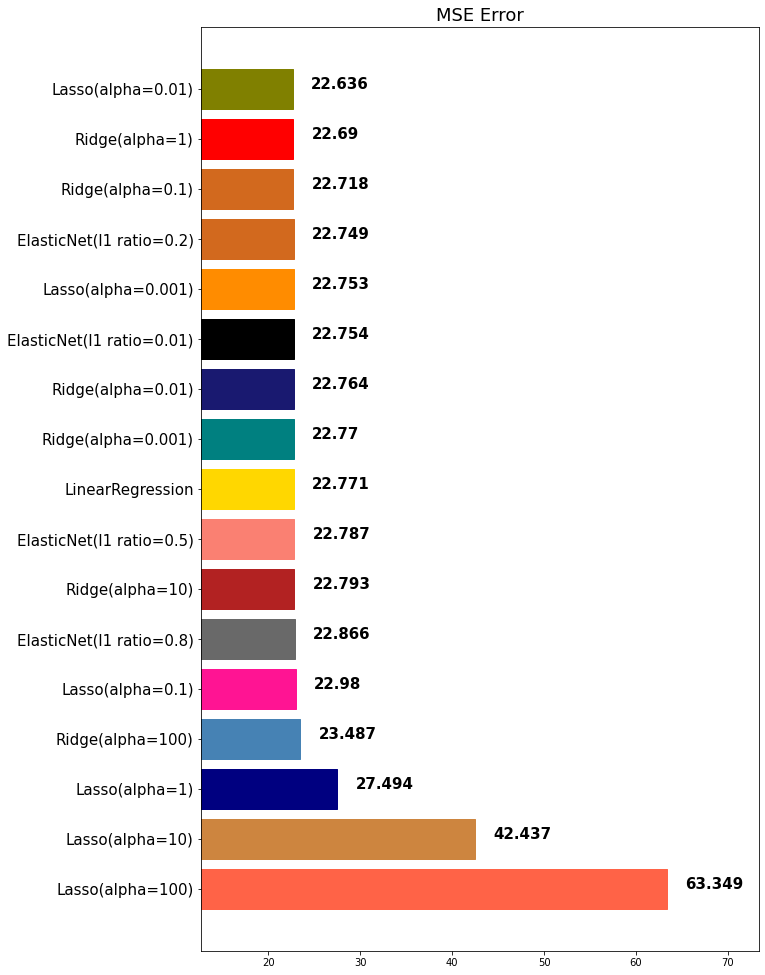

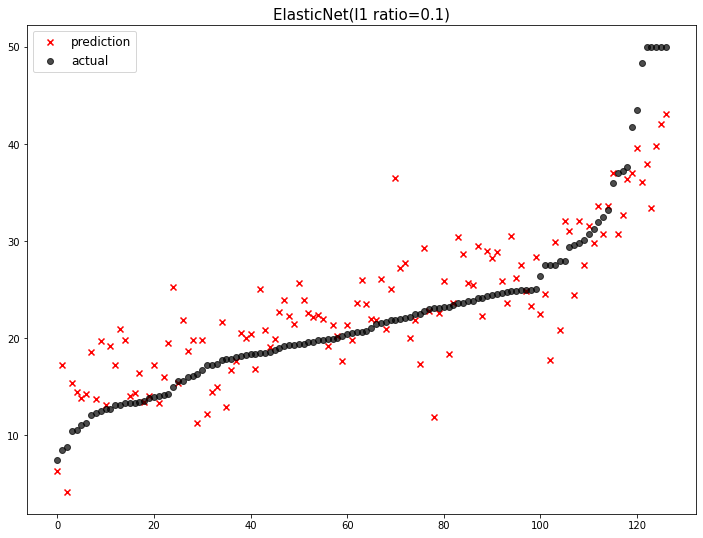

                        model        mse
0            Lasso(alpha=100)  63.348818
1             Lasso(alpha=10)  42.436622
2              Lasso(alpha=1)  27.493672
3            Ridge(alpha=100)  23.487453
4            Lasso(alpha=0.1)  22.979708
5    ElasticNet(l1 ratio=0.8)  22.865628
6             Ridge(alpha=10)  22.793119
7    ElasticNet(l1 ratio=0.5)  22.787269
8            LinearRegression  22.770784
9          Ridge(alpha=0.001)  22.770117
10          Ridge(alpha=0.01)  22.764254
11  ElasticNet(l1 ratio=0.01)  22.753745
12         Lasso(alpha=0.001)  22.753017
13   ElasticNet(l1 ratio=0.1)  22.749627
14   ElasticNet(l1 ratio=0.2)  22.749018
15           Ridge(alpha=0.1)  22.718126
16             Ridge(alpha=1)  22.690411
17          Lasso(alpha=0.01)  22.635614


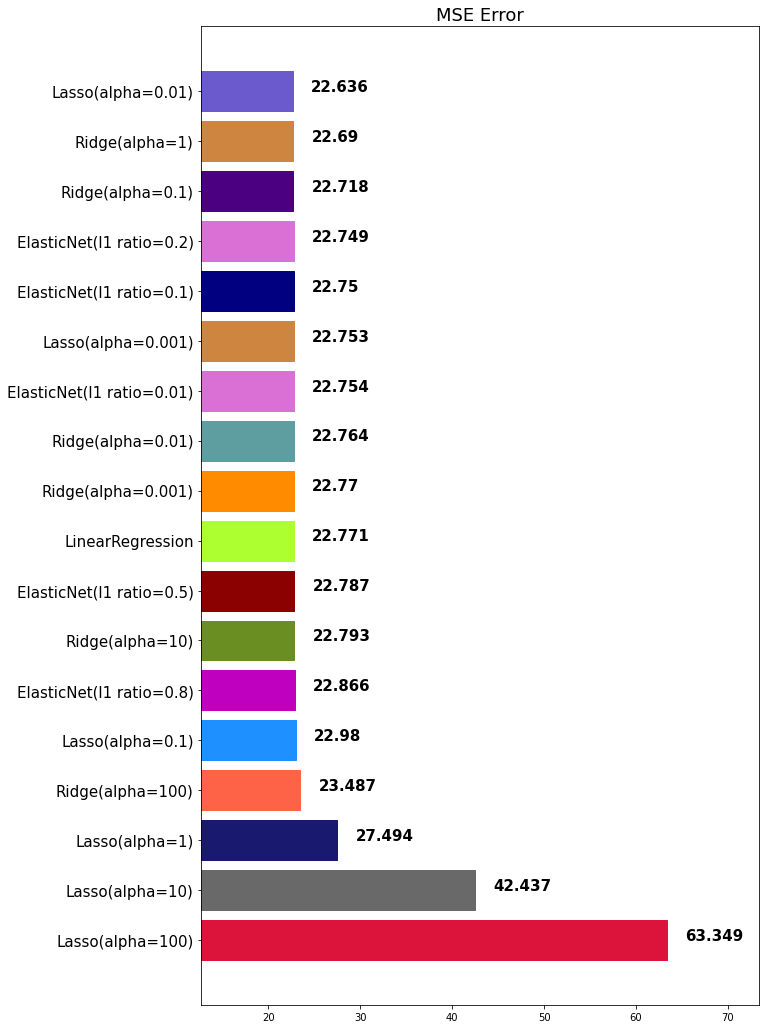

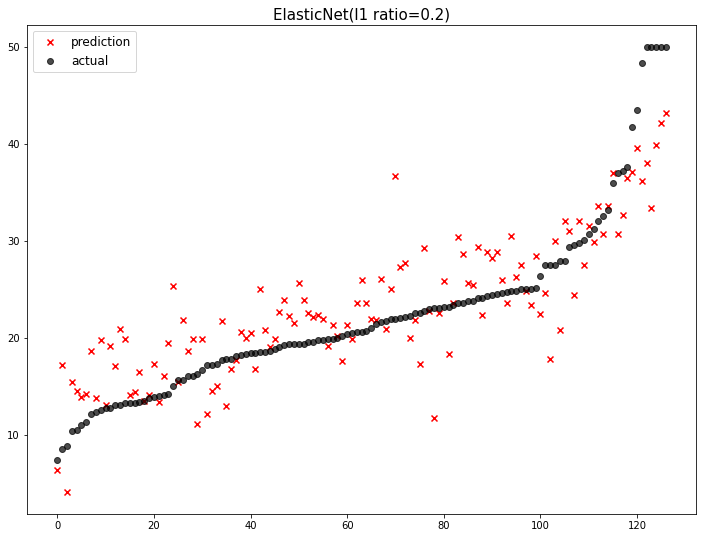

                        model        mse
0            Lasso(alpha=100)  63.348818
1             Lasso(alpha=10)  42.436622
2              Lasso(alpha=1)  27.493672
3            Ridge(alpha=100)  23.487453
4            Lasso(alpha=0.1)  22.979708
5    ElasticNet(l1 ratio=0.8)  22.865628
6             Ridge(alpha=10)  22.793119
7    ElasticNet(l1 ratio=0.5)  22.787269
8            LinearRegression  22.770784
9          Ridge(alpha=0.001)  22.770117
10          Ridge(alpha=0.01)  22.764254
11  ElasticNet(l1 ratio=0.01)  22.753745
12         Lasso(alpha=0.001)  22.753017
13   ElasticNet(l1 ratio=0.1)  22.749627
14   ElasticNet(l1 ratio=0.2)  22.749018
15           Ridge(alpha=0.1)  22.718126
16             Ridge(alpha=1)  22.690411
17          Lasso(alpha=0.01)  22.635614


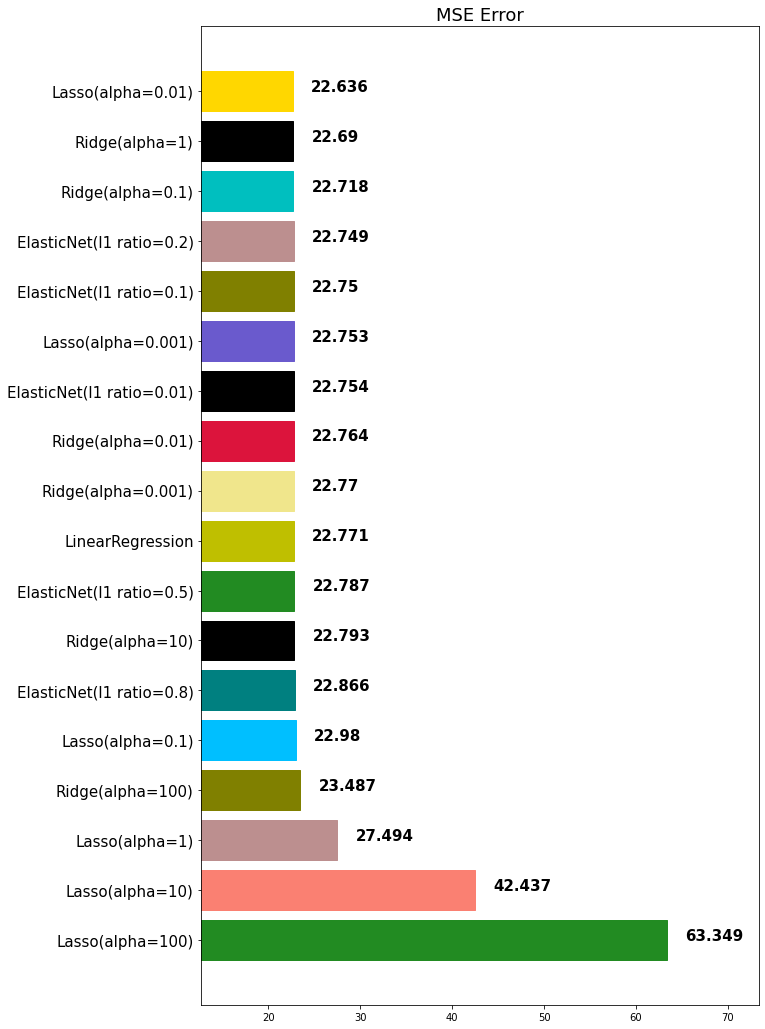

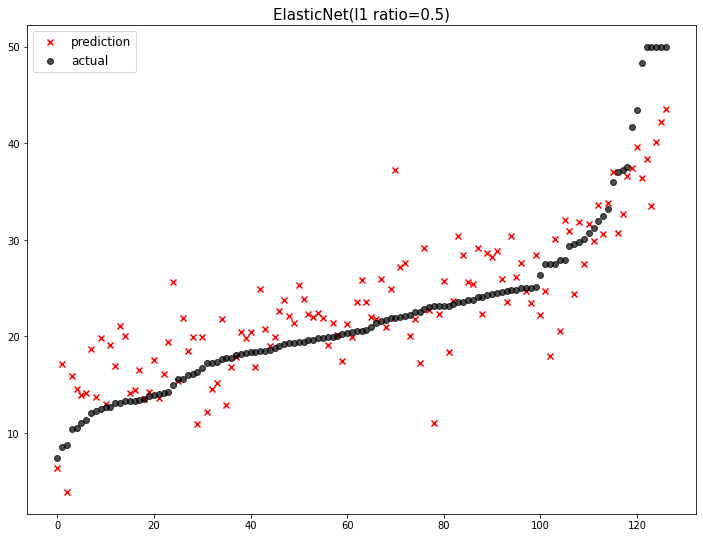

                        model        mse
0            Lasso(alpha=100)  63.348818
1             Lasso(alpha=10)  42.436622
2              Lasso(alpha=1)  27.493672
3            Ridge(alpha=100)  23.487453
4            Lasso(alpha=0.1)  22.979708
5    ElasticNet(l1 ratio=0.8)  22.865628
6             Ridge(alpha=10)  22.793119
7    ElasticNet(l1 ratio=0.5)  22.787269
8            LinearRegression  22.770784
9          Ridge(alpha=0.001)  22.770117
10          Ridge(alpha=0.01)  22.764254
11  ElasticNet(l1 ratio=0.01)  22.753745
12         Lasso(alpha=0.001)  22.753017
13   ElasticNet(l1 ratio=0.1)  22.749627
14   ElasticNet(l1 ratio=0.2)  22.749018
15           Ridge(alpha=0.1)  22.718126
16             Ridge(alpha=1)  22.690411
17          Lasso(alpha=0.01)  22.635614


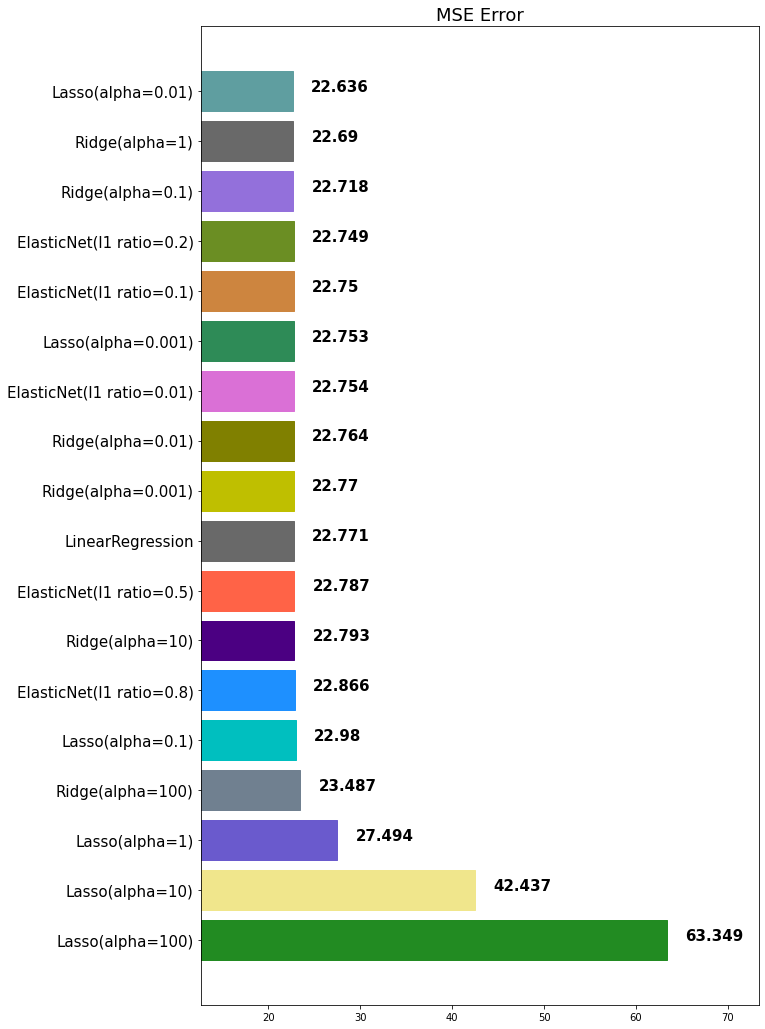

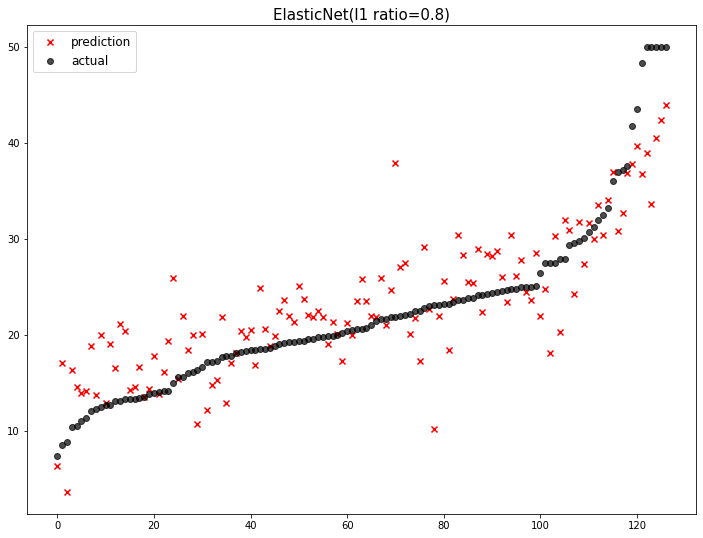

                        model        mse
0            Lasso(alpha=100)  63.348818
1             Lasso(alpha=10)  42.436622
2              Lasso(alpha=1)  27.493672
3            Ridge(alpha=100)  23.487453
4            Lasso(alpha=0.1)  22.979708
5    ElasticNet(l1 ratio=0.8)  22.865628
6             Ridge(alpha=10)  22.793119
7    ElasticNet(l1 ratio=0.5)  22.787269
8            LinearRegression  22.770784
9          Ridge(alpha=0.001)  22.770117
10          Ridge(alpha=0.01)  22.764254
11  ElasticNet(l1 ratio=0.01)  22.753745
12         Lasso(alpha=0.001)  22.753017
13   ElasticNet(l1 ratio=0.1)  22.749627
14   ElasticNet(l1 ratio=0.2)  22.749018
15           Ridge(alpha=0.1)  22.718126
16             Ridge(alpha=1)  22.690411
17          Lasso(alpha=0.01)  22.635614


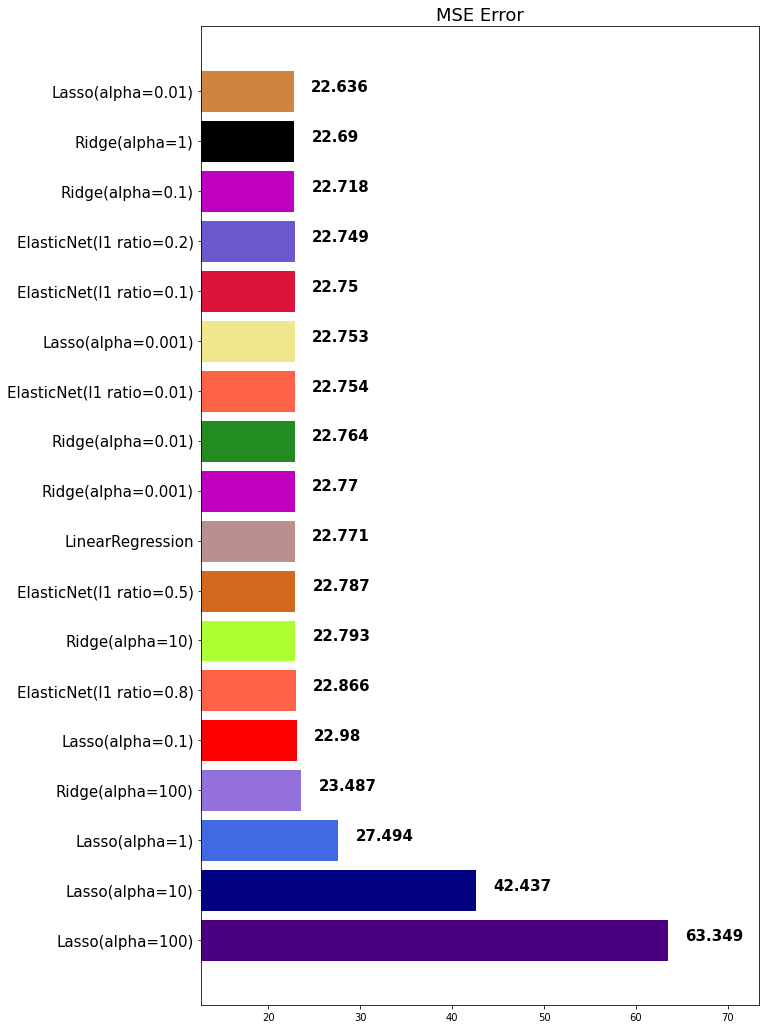

In [50]:
# alpha=0.5로 고정

for ratio in ratios:
  elasticnet=ElasticNet(alpha=0.1, l1_ratio=ratio)
  elasticnet.fit(x_train,y_train)
  elas_pred=elasticnet.predict(x_valid)
  mse_eval('ElasticNet(l1 ratio={})'.format(ratio),y_valid,elas_pred)

In [51]:
# coefficients 값 확인
# l1_ratio=0.2
elasticnet_2=ElasticNet(alpha=0.1,l1_ratio=0.2)
elasticnet_2.fit(x_train,y_train)
elas_pred_2=elasticnet_2.predict(x_valid)

In [53]:
# l1_ratio=0.8
elasticnet_8=ElasticNet(alpha=0.1,l1_ratio=0.8)
elasticnet_8.fit(x_train,y_train)
elas_pred_8=elasticnet_8.predict(x_valid)

In [54]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [55]:
elasticnet_2.coef_

array([-0.09297585,  0.05293361, -0.03950412,  1.30126199, -0.41996826,
        3.15838796, -0.00644646, -1.15290012,  0.25973467, -0.01231233,
       -0.77186571,  0.01201684, -0.60780037])

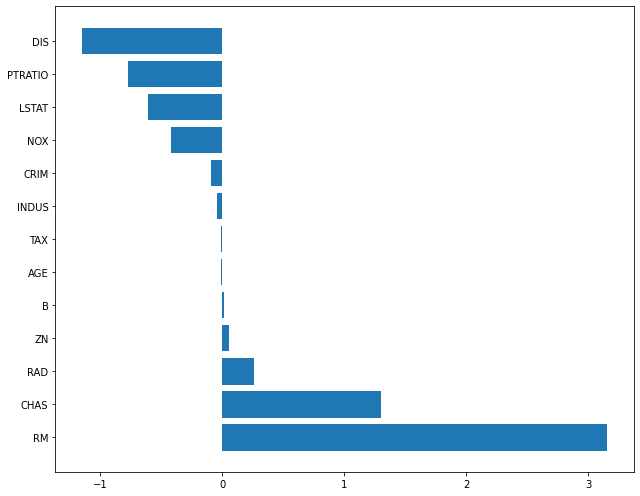

In [56]:
plot_coef(x_train.columns,elasticnet_2.coef_)

In [57]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [58]:
elasticnet_8.coef_

array([-0.08797633,  0.05035601, -0.03058513,  1.51071961, -0.        ,
        3.70247373, -0.01017259, -1.12431077,  0.24389841, -0.01189981,
       -0.73481448,  0.01259147, -0.573733  ])

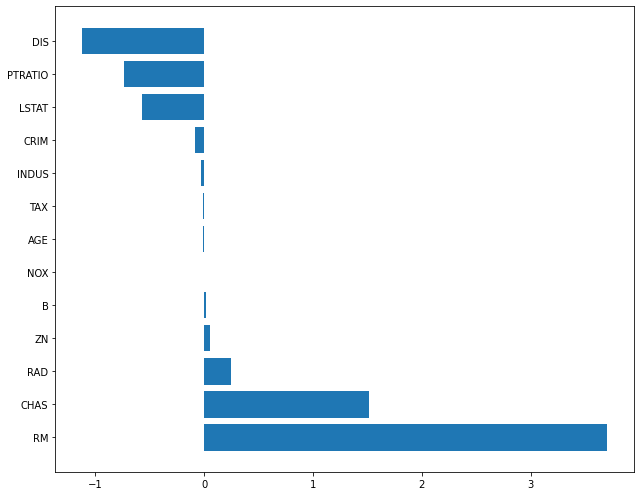

In [59]:
plot_coef(x_train.columns,elasticnet_8.coef_)

# **4. Scaling**
### **4-1. Scaler 소개**



*   StandardScaler
*   MinMaxScaler
*   RobustScaler

**<스케일링이란>>**

보통 학습에 사용될 데이터들은 각 특성마다 데이터가 가질 수 있는 값의 범위가 다르다. 그리고 대부분의 학습 알고리즘은 특성 간 데이터 범위가 다를 경우 잘 동작하지 않는다. 그 이유는 간단하다.

예를 들어, 나이와 재산이라는 특성이 있을 때, 재산의 값이 나이보다 훨씬 크기 때문에 재산에 치중한 학습을 하게 된다. 

따라서 학습을 진행하기에 앞서 데이터 스케일링 작업을 통해, 모든 특성의 범위(또는 분포)를 같게 하는 것은 필수적이다. 참고로 decision tree 계열의 알고리즘들은 스케일링이 필수는 아니다.


**<주로 사용되는 스케일링 개념>**


*   **Standardization(표준화)**
    *   특성들의 평균을 0, 분산을 1로 스케일링하는 것
    *   즉, 특성들을 정규분포로 만드는 것

*   **Normalization(정규화)**
    *   특성들을 특정 범위(주로 [0,1])로 스케일링 하는 것
    *   가장 작은 값은 0, 가장 큰 값은 1로 변환되므로, 모든 특성들은 [0,1] 범위를 갖게 된다.


**<scikit-learn 의 scaler 사용 전, 주의 사항>**


1.   scaler는 fit과 transform 메서드를 지니고 있다.
2.   fit 메서드는 훈련 데이터에만 적용해, 훈련 데이터의 분포를 먼저 학습하고
3.   그 이후, transform 메서드를 훈련 데이터와 테스트 데이터에 적용해 스케일을 조정해야 한다.
4.   **따라서, 훈련 데이터에는 fit_transform() 메서드를 적용하고, 테스트 데이터에는 transform() 메서드를 적용해야 한다.**
    * fit_transform()은 fit과 transform이 결합된 단축 메서드이다.
5.   또한, 스케일링할 때, 모든 특성의 범위를 유사하게 만드는 것은 중요하지만, 그렇다고 모두 같은 분포로 만들 필요는 없다.
    * 특성에 따라 각기 다른 스케일링을 적용하는게 유리할 수도 있기 떄문이다.


In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [63]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.512192,11.779683,10.995013,0.076517,0.548712,6.266953,67.223483,3.917811,9.282322,404.680739,18.448549,357.048100,12.633773
std,8.338717,23.492842,6.792065,0.266175,0.115006,0.681796,28.563787,2.084167,8.583051,166.813256,2.154917,92.745266,7.259213
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,2.520000,1.730000
25%,0.078910,0.000000,5.190000,0.000000,0.445000,5.876500,42.250000,2.150900,4.000000,278.000000,17.150000,375.425000,6.910000
50%,0.228760,0.000000,9.690000,0.000000,0.532000,6.208000,74.400000,3.414500,5.000000,330.000000,19.000000,392.110000,11.380000
75%,2.756855,19.000000,18.100000,0.000000,0.624000,6.611000,93.850000,5.400900,8.000000,666.000000,20.200000,396.260000,16.580000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.398000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000


### StandardScaler

* 평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 scaler
* 최솟값과 최댓값의 크기를 제한하지 않기 때문에, 어떤 알고리즘에서는 문제가 있을 수 있다.
* **이상치에 매우 민감하다.**
* 회귀보다 분류에 유용하다.

In [66]:
# 변형 객체 생성
std_scaler=StandardScaler()
std_scaled=std_scaler.fit_transform(x_train)
round(pd.DataFrame(std_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.50,-1.55,-0.29,-1.43,-3.97,-2.25,-1.34,-0.97,-1.30,-2.72,-3.83,-1.50
25%,-0.41,-0.50,-0.86,-0.29,-0.90,-0.57,-0.88,-0.85,-0.62,-0.76,-0.60,0.20,-0.79
50%,-0.39,-0.50,-0.19,-0.29,-0.15,-0.09,0.25,-0.24,-0.50,-0.45,0.26,0.38,-0.17
75%,-0.09,0.31,1.05,-0.29,0.66,0.51,0.93,0.71,-0.15,1.57,0.81,0.42,0.54
max,8.41,3.76,2.47,3.47,2.81,3.13,1.15,3.20,1.72,1.84,1.65,0.43,3.49


### MinMaxScaler()

* Min-Max Normalization 이라고도 불린다.
* 특성들을 특정 범위(주로[0,1])로 스케일링 하는 것이다.
    * 가장 작은 값은 0, 가장 큰 값은 1로 변환되므로, 모든 특성들은 [0,1] 범위를 갖게된다.
* **이상치에 매우 민감하다.**
* 분류보다 회귀에 유용하다.


In [68]:
minmax_scaler=MinMaxScaler()
minmax_scaled=minmax_scaler.fit_transform(x_train)
round(pd.DataFrame(minmax_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.05,0.12,0.39,0.08,0.34,0.56,0.66,0.29,0.36,0.41,0.62,0.90,0.30
std,0.11,0.23,0.25,0.27,0.24,0.14,0.29,0.22,0.37,0.32,0.23,0.24,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.12,0.48,0.41,0.11,0.13,0.17,0.48,0.95,0.14
50%,0.00,0.00,0.34,0.00,0.30,0.55,0.74,0.24,0.17,0.27,0.68,0.99,0.27
75%,0.04,0.19,0.65,0.00,0.49,0.63,0.94,0.45,0.30,0.91,0.81,1.00,0.41
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler()
* 평균과 분산 대신에 중간 값과 사분위 값을 사용한다.
    *  중간 값은 정렬시 중간에 있는 값
    *  사분위 값은 1/4, 3/4에 위치한 값
* 이상치 영향을 최소화할 수 있다.

In [69]:
robust_scaler=RobustScaler()
robust_scaled=robust_scaler.fit_transform(x_train)
round(pd.DataFrame(robust_scaled).median(),2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### **4-2. Scaling 후 모델 학습 - 파이프라인 활용**

In [70]:
from sklearn.pipeline import make_pipeline

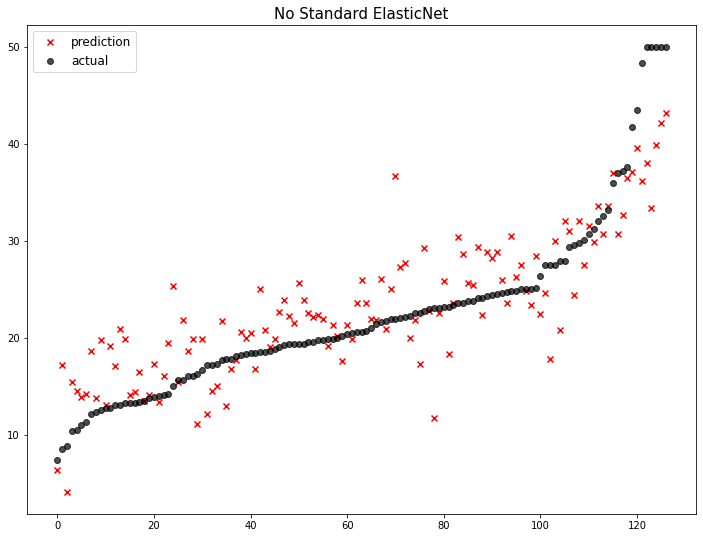

                        model        mse
0            Lasso(alpha=100)  63.348818
1             Lasso(alpha=10)  42.436622
2              Lasso(alpha=1)  27.493672
3            Ridge(alpha=100)  23.487453
4            Lasso(alpha=0.1)  22.979708
5    ElasticNet(l1 ratio=0.8)  22.865628
6             Ridge(alpha=10)  22.793119
7    ElasticNet(l1 ratio=0.5)  22.787269
8            LinearRegression  22.770784
9          Ridge(alpha=0.001)  22.770117
10          Ridge(alpha=0.01)  22.764254
11  ElasticNet(l1 ratio=0.01)  22.753745
12         Lasso(alpha=0.001)  22.753017
13   ElasticNet(l1 ratio=0.1)  22.749627
14   ElasticNet(l1 ratio=0.2)  22.749018
15     No Standard ElasticNet  22.749018
16           Ridge(alpha=0.1)  22.718126
17             Ridge(alpha=1)  22.690411
18          Lasso(alpha=0.01)  22.635614


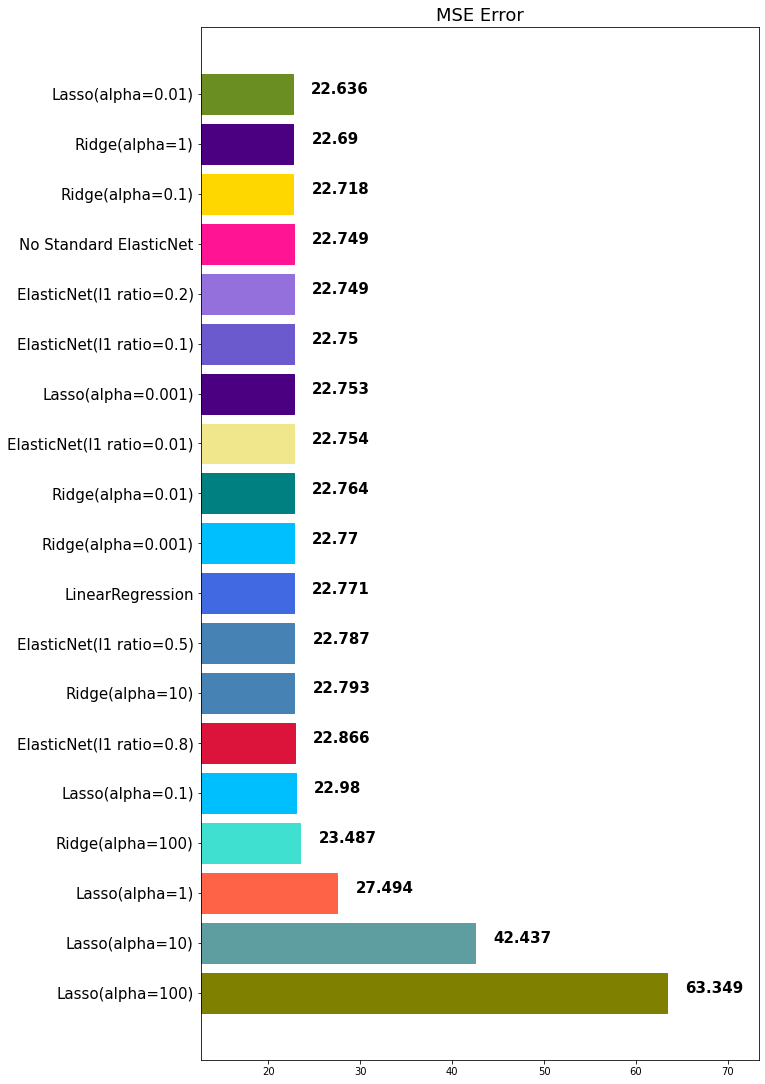

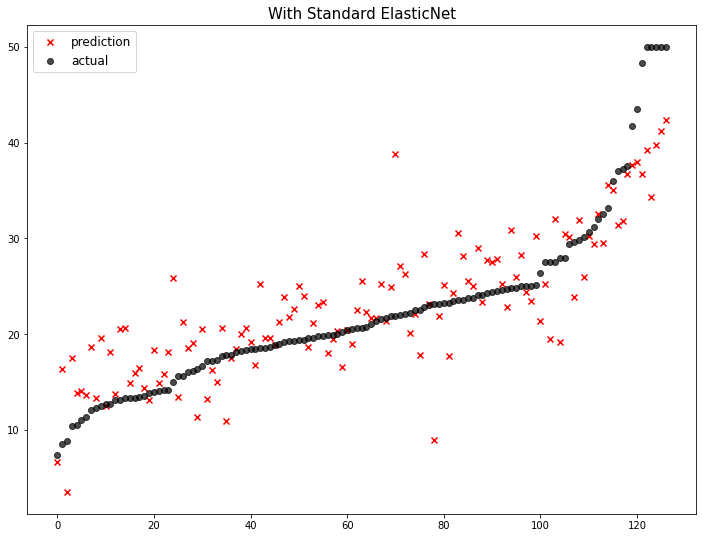

                        model        mse
0            Lasso(alpha=100)  63.348818
1             Lasso(alpha=10)  42.436622
2              Lasso(alpha=1)  27.493672
3            Ridge(alpha=100)  23.487453
4    With Standard ElasticNet  23.230164
5            Lasso(alpha=0.1)  22.979708
6    ElasticNet(l1 ratio=0.8)  22.865628
7             Ridge(alpha=10)  22.793119
8    ElasticNet(l1 ratio=0.5)  22.787269
9            LinearRegression  22.770784
10         Ridge(alpha=0.001)  22.770117
11          Ridge(alpha=0.01)  22.764254
12  ElasticNet(l1 ratio=0.01)  22.753745
13         Lasso(alpha=0.001)  22.753017
14   ElasticNet(l1 ratio=0.1)  22.749627
15   ElasticNet(l1 ratio=0.2)  22.749018
16     No Standard ElasticNet  22.749018
17           Ridge(alpha=0.1)  22.718126
18             Ridge(alpha=1)  22.690411
19          Lasso(alpha=0.01)  22.635614


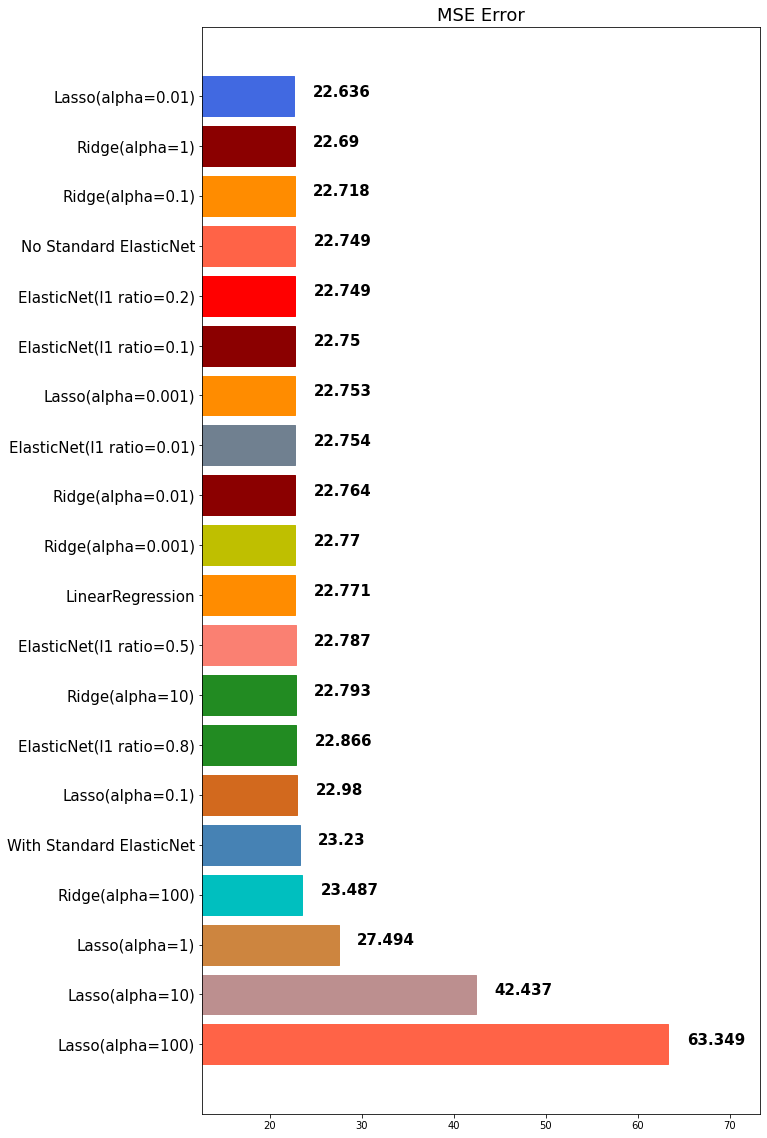

In [72]:
# elasticnet(alpha=0.1, l1_ratio=0.2) < without standard scaling >
elasticnet_no_scale=ElasticNet(alpha=0.1,l1_ratio=0.2)
no_scale_pred=elasticnet_no_scale.fit(x_train,y_train).predict(x_valid)
mse_eval('No Standard ElasticNet', y_valid, no_scale_pred)

# elasticnet(alpha=0.1, l1_ratio=0.2) < with standard scaling >
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

with_scale_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_valid)
mse_eval('With Standard ElasticNet', y_valid, with_scale_pred)

# **5. Polynomial Features**

다항식의 계수간 상호작용을 통해 새로운 feature를 생성한다.

예를 들면, [a,b] 2개의 feature가 존재한다고 가정하고,

degree=2로 설정한다면, polynomial features는 [1,a,b,a^2,ab,b^2]가 된다.

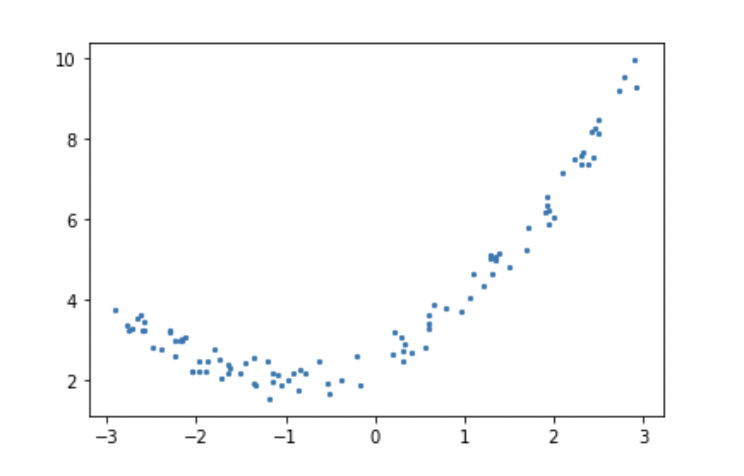

*  위와 같은 데이터는 데이터의 분포가 곡선으로 나타나기 때문에 일반적인 선형회귀로 해결할 수 없다. (비선형)

*  따라서, 다항회귀를 사용한다. 다항회귀란 위와 같이 데이터들간의 형태가 비선형일 때, 데이터에 각 특성의 제곱을 추가해주어서 특성이 추가된 비선형 데이터를 선형 회귀 모델로 훈련시키는 방법이다.

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
# Polynomial Features 생성
poly=PolynomialFeatures(degree=2, include_bias=False)

In [78]:
poly_features=poly.fit_transform(x_train)[0]
poly_features

array([     0.12329   ,      0.        ,     10.01      ,      0.        ,
            0.547     ,      5.913     ,     92.9       ,      2.3534    ,
            6.        ,    432.        ,     17.8       ,    394.95      ,
           16.21      ,      0.01520042,      0.        ,      1.2341329 ,
            0.        ,      0.06743963,      0.72901377,     11.453641  ,
            0.29015069,      0.73974   ,     53.26128   ,      2.194562  ,
           48.6933855 ,      1.9985309 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,    100.2001    ,      0.        ,
            5.47547   ,     59.18913   ,    929.929     ,     23.557534  ,
           60.06      ,   4324.32      ,    178.178     ,   3953.4495    ,
          162.2621    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [79]:
x_train.iloc[0]

CRIM         0.12329
ZN           0.00000
INDUS       10.01000
CHAS         0.00000
NOX          0.54700
RM           5.91300
AGE         92.90000
DIS          2.35340
RAD          6.00000
TAX        432.00000
PTRATIO     17.80000
B          394.95000
LSTAT       16.21000
Name: 112, dtype: float64

In [80]:
# Polynomial Features + Standard Scaling 후 모델 학습
poly_pipeline=make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1,l1_ratio=0.2)
)

In [82]:
poly_pred=poly_pipeline.fit(x_train,y_train).predict(x_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+01, tolerance: 3.237e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


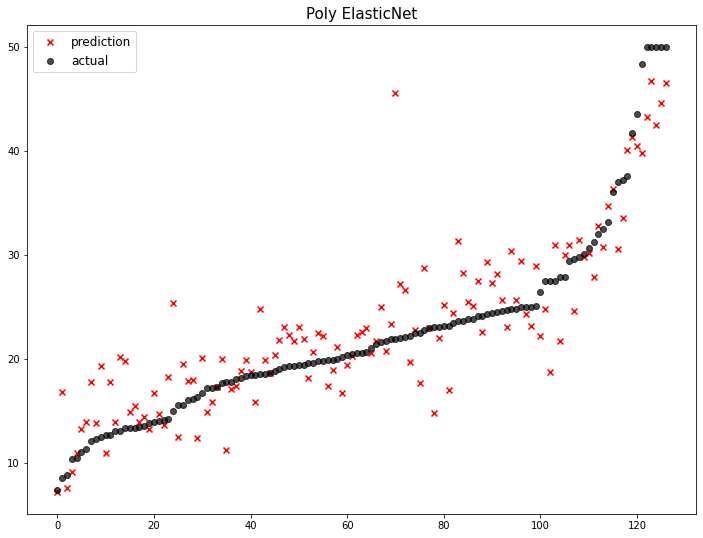

                        model        mse
0            Lasso(alpha=100)  63.348818
1             Lasso(alpha=10)  42.436622
2              Lasso(alpha=1)  27.493672
3            Ridge(alpha=100)  23.487453
4    With Standard ElasticNet  23.230164
5            Lasso(alpha=0.1)  22.979708
6    ElasticNet(l1 ratio=0.8)  22.865628
7             Ridge(alpha=10)  22.793119
8    ElasticNet(l1 ratio=0.5)  22.787269
9            LinearRegression  22.770784
10         Ridge(alpha=0.001)  22.770117
11          Ridge(alpha=0.01)  22.764254
12  ElasticNet(l1 ratio=0.01)  22.753745
13         Lasso(alpha=0.001)  22.753017
14   ElasticNet(l1 ratio=0.1)  22.749627
15   ElasticNet(l1 ratio=0.2)  22.749018
16     No Standard ElasticNet  22.749018
17           Ridge(alpha=0.1)  22.718126
18             Ridge(alpha=1)  22.690411
19          Lasso(alpha=0.01)  22.635614
20            Poly ElasticNet  17.526214


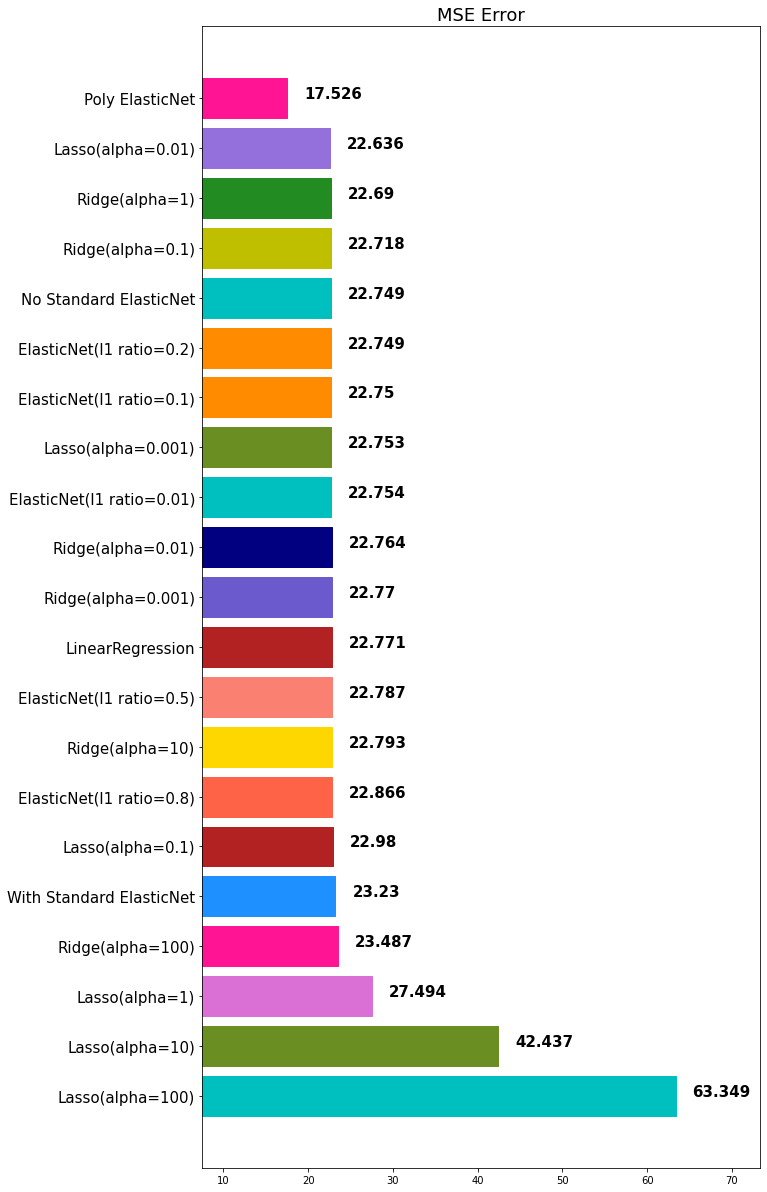

In [83]:
mse_eval('Poly ElasticNet', y_valid, poly_pred)